In [2]:
import numpy as np
#import pandas as pd
import cv2
import os
import time
import matplotlib.pyplot as plt
import hdf5storage
import scipy.io as scio
import h5py
%matplotlib inline
from keras.models import Sequential, model_from_json, Model, load_model
from keras.optimizers import SGD
from keras.layers import Input, Reshape, concatenate, Activation, Flatten, merge
from keras.layers import Convolution2D, MaxPooling2D, Dense, Dropout
from keras import backend as K
from keras.callbacks import TensorBoard

/home/smiletranquilly/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
def scale_invarient_error(y_true,y_pred):
    log_1=K.log(K.clip(y_pred,K.epsilon(),np.inf)+1.)
    log_2=K.log(K.clip(y_true,K.epsilon(),np.inf)+1.)
    return K.mean(K.square(log_1-log_2),axis=-1)-Lambda*K.square(K.mean(log_1-log_2,axis=-1))

def rescale(data):
    data=data.astype('float32')
    data /= 255.0   
    return data

def pred_single_image_depth_using_fine(path):
    model=load_model(fine_dir,custom_objects={'scale_invarient_error':scale_invarient_error})
    img_array=cv2.imread(path)
    img_array=np.expand_dims(img_array,axis=0)
    img_array=np.array([cv2.resize(img_array[i],(img_cols,img_row)) for i in range(1)])
    img_array=np.array([cv2.pyrDown(img_array[i]) for i in range(1)])
    img_array=rescale(img_array)
    out=model.predict(img_array)
    return out

def display_image(path):
    img_array=plt.imread(path)
    img_array=np.expand_dims(img_array,axis=0) 
    img_array=np.array([cv2.resize(img_array[i],(img_cols,img_row)) for i in range(1)])
    img_array=rescale(img_array)
    plt.imshow(img_array[0])


In [4]:
img_row=1024
img_cols=1024
Lambda=0.5
dataFile='/home/Dataset/Potsdam_1024.mat'
#设置当前目录
root = '/home/smiletranquilly/Multi-Scale_Deep_Network' 
os.chdir(root)
fine_dir='./fine_data/building_fine_model.h5'

length of X_data is 1024
length of y_data is 1024
(1, 128, 128)
(1, 128, 128)


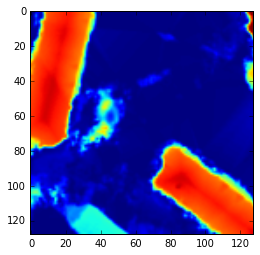

In [5]:
with h5py.File(dataFile, "r") as mat:
    # number of the first dim
    X_data = mat['images'][328].transpose((1,2,0))
    print("length of X_data is %d" % len(X_data))
    y_data = mat['depths'][328]
    print("length of y_data is %d" % len(y_data))

#predict
model=load_model(fine_dir,custom_objects={'scale_invarient_error':scale_invarient_error})
# 归一化
X_train=rescale(X_data)
y_train=rescale(y_data)
#input shape is n*H*w*c
X_train=np.expand_dims(X_train,axis=0)
y_train=np.expand_dims(y_train,axis=0)
X_train=np.array([cv2.pyrDown(X_train[i]) for i in range(1)])
y_train=np.array([cv2.pyrDown(y_train[i]) for i in range(1)])
for j in range(2):
    # lable[128*128]   
    y_train=np.array([cv2.pyrDown(y_train[i]) for i in range(1)])

out=model.predict(X_train)
print out.shape
print y_train.shape

plt.imshow(y_train[0])


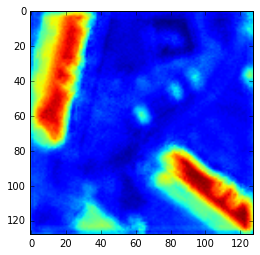

In [9]:
plt.imshow(out[0])
plt.savefig("outputs.jpg")  

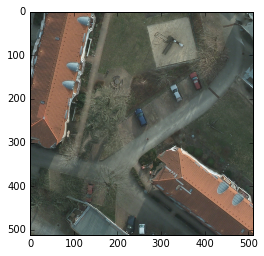

In [8]:
plt.imshow(X_train[0])
plt.savefig("inputs.jpg")  

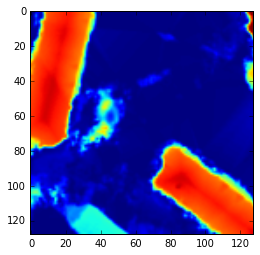

In [10]:
plt.imshow(y_train[0])
plt.savefig("targets.jpg") 